In [61]:
from absl import logging

import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
tf.random.set_seed(0)

import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import time

try:
  from google.colab import files
except ImportError:
  pass

from IPython import display
from skimage import transform

# We could retrieve this value from module.get_input_shapes() if we didn't know
# beforehand which module we will be using.
latent_dim = 256


# Interpolates between two vectors that are non-zero and don't both lie on a
# line going through origin. First normalizes v2 to have the same norm as v1. 
# Then interpolates between the two vectors on the hypersphere.
def interpolate_hypersphere(v1, v2, num_steps):
  v1_norm = tf.norm(v1)
  v2_norm = tf.norm(v2)
  v2_normalized = v2 * (v1_norm / v2_norm)

  vectors = []
  for step in range(num_steps):
    interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
    interpolated_norm = tf.norm(interpolated)
    interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
    vectors.append(interpolated_normalized)
  return tf.stack(vectors)

# Simple way to display an image.
def display_image(image):
  image = tf.constant(image)
  image = tf.image.convert_image_dtype(image, tf.uint8)
  return PIL.Image.fromarray(image.numpy())

# Given a set of images, show an animation.
def animate(images):
  images = np.array(images)
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images)
  return embed.embed_file('./animation.gif')

logging.set_verbosity(logging.ERROR)

In [ ]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [165]:
v1 = tf.random.normal([latent_dim]) 
v2 = tf.random.normal([latent_dim])

In [ ]:
def interpolate_between_vectors(v1, v2):
  # Add attributes to the vectors. These attributes are one-hot encoded and
  v_atrb = tf.one_hot([5], 256)
  
  v1 = tf.add(v1, v_atrb)
  v2 = tf.add(v2, v_atrb)

  # Creates a tensor with 25 steps of interpolation between v1 and v2.
  vectors = interpolate_hypersphere(v1, v2, 100)

  # Uses module to generate images from the latent space.
  interpolated_images = progan(tf.stack([v_atrb, v_atrb]))['default']

  return interpolated_images

interpolated_images = interpolate_between_vectors(v1, v2)
animate(interpolated_images)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\pink\anaconda3\envs\cnn\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pink\AppData\Local\Temp\ipykernel_34852\2310565716.py", line 22, in <module>
    interpolated_images = interpolate_between_vectors(v1, v2)
  File "C:\Users\pink\AppData\Local\Temp\ipykernel_34852\2310565716.py", line 13, in interpolate_between_vectors
    interpolated_imaged = progan(dict(
  File "c:\Users\pink\anaconda3\envs\cnn\lib\site-packages\tensorflow\python\eager\function.py", line 1604, in __call__
  File "c:\Users\pink\anaconda3\envs\cnn\lib\site-packages\tensorflow\python\eager\wrap_function.py", line 243, in _call_impl
    atomic_fn = atomic_function.from_func_graph(
  File "c:\Users\pink\anaconda3\envs\cnn\lib\site-packages\tensorflow\python\eager\function.py", line 1622, in _call_impl
  File "c:\Users\pink\anaconda3\envs\cnn\lib\site-packages\tensorflow

In [99]:
v1_atrb = tf.one_hot([1], 256)
v1 = tf.random.normal([latent_dim]) 

v2_atrb = tf.one_hot([2, 3], 256)

v1
  

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 1.4389015 , -0.40050414,  1.1320019 , -0.0249302 , -0.13161165,
       -0.04956882,  1.025334  ,  1.2756721 ,  1.7422156 ,  0.8097596 ,
        2.2802138 , -0.87963647, -0.29629198, -1.4081595 ,  0.9312645 ,
       -0.53371686,  0.08170635, -2.078609  , -0.40844026, -0.3183067 ,
       -0.57180774,  1.2680321 ,  0.888489  ,  0.2791276 , -0.08014178,
       -1.3658342 ,  1.3963414 ,  0.32126728,  0.6704886 , -0.4323638 ,
        0.42752483, -2.0265856 , -0.47947928, -0.88326293, -1.0404711 ,
       -1.2023605 ,  1.4600686 ,  1.2925279 , -0.11990701,  0.34466454,
       -1.3997982 , -1.1279385 ,  0.98586184,  0.82414865, -0.19126995,
        2.6635165 ,  1.822535  ,  0.9737774 ,  0.56860197,  0.21893534,
       -1.6888574 ,  0.3918628 , -0.73165864, -1.7139405 ,  0.4573481 ,
        0.58761394,  0.24686506, -0.37318102,  0.58680606,  1.7893587 ,
        1.2873071 , -0.7092137 , -1.2875497 , -1.6190431 , -0.16197371,
        0.919363

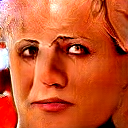

In [32]:
image_from_module_space = True  # @param { isTemplate:true, type:"boolean" }

def get_module_space_image():
  vector = tf.random.normal([1, latent_dim])
  images = progan(vector)['default'][0]
  return images

def upload_image():
  uploaded = files.upload()
  image = imageio.imread(uploaded[list(uploaded.keys())[0]])
  return transform.resize(image, [128, 128])

if image_from_module_space:
  target_image = get_module_space_image()
else:
  target_image = upload_image()

display_image(target_image)

In [33]:
tf.random.set_seed(42)
initial_vector = tf.random.normal([1, latent_dim])

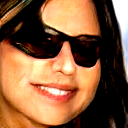

In [41]:
display_image(progan(initial_vector)['default'][0])

In [40]:
def find_closest_latent_vector(initial_vector, num_optimization_steps,
                               steps_per_image):
  images = []
  losses = []

  vector = tf.Variable(initial_vector)  
  optimizer = tf.optimizers.Adam(learning_rate=0.01)
  loss_fn = tf.losses.MeanAbsoluteError(reduction="sum")

  for step in range(num_optimization_steps):
    if (step % 100)==0:
      print()
    print('.', end='')
    with tf.GradientTape() as tape:
      image = progan(vector.read_value())['default'][0]
      if (step % steps_per_image) == 0:
        images.append(image.numpy())
      target_image_difference = loss_fn(image, target_image[:,:,:3])
      # The latent vectors were sampled from a normal distribution. We can get
      # more realistic images if we regularize the length of the latent vector to 
      # the average length of vector from this distribution.
      regularizer = tf.abs(tf.norm(vector) - np.sqrt(latent_dim))

      loss = target_image_difference + regularizer
      losses.append(loss.numpy())
    grads = tape.gradient(loss, [vector])
    optimizer.apply_gradients(zip(grads, [vector]))

  return images, losses


num_optimization_steps=200
steps_per_image=5
images, loss = find_closest_latent_vector(initial_vector, num_optimization_steps, steps_per_image)


....................................................................................................
....................................................................................................

(0.0, 5363.549957275391)

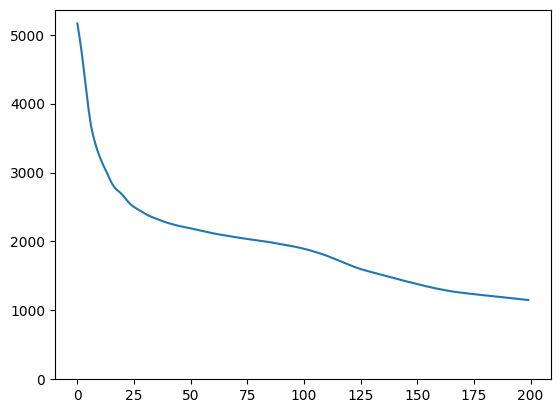

In [36]:
plt.plot(loss)
plt.ylim([0,max(plt.ylim())])


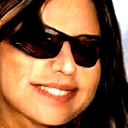

In [42]:
animate(np.stack(images))

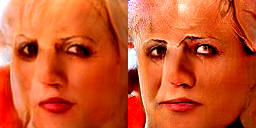

In [43]:
display_image(np.concatenate([images[-1], target_image], axis=1))